**Parte 1.Importar Librerías y Cargar Datos.**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Cargar el DataFrame desde la URL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)

In [39]:
# Valores nulos
print(df.isnull().sum())

# Extract nested dictionaries into new columns
df = pd.json_normalize(df.to_dict('records'))

# Duplicados
print("Duplicados:", df.duplicated().sum())

# Revisión de tipos de datos
print(df.dtypes)

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
Duplicados: 0
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [40]:
# Eliminar la columna 'ClienteID'
df = df.drop(columns=['customerID'])

# Convertir 'TotalGasto' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminar filas con valores nulos
df = df.dropna()

print("Información del DataFrame después de la limpieza:")
df.info()
df.head()

Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   object 
 1   customer.gender            7256 non-null   object 
 2   customer.SeniorCitizen     7256 non-null   int64  
 3   customer.Partner           7256 non-null   object 
 4   customer.Dependents        7256 non-null   object 
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   object 
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  int

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Parte 2. Análisis de Proporción de Evasión.

Proporción de cancelación:\nChurn
No     0.711549
Yes    0.257580
       0.030871
Name: proportion, dtype: float64


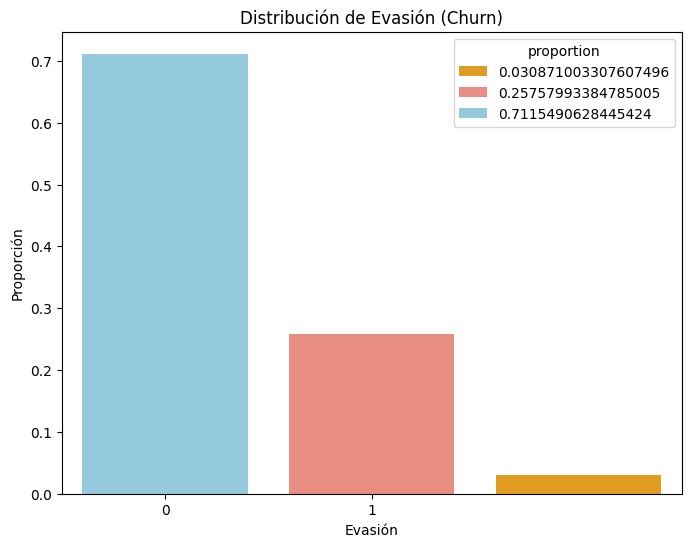

In [51]:
churn_counts = df['Churn'].value_counts(normalize=True)
print(f"Proporción de cancelación:\\n{churn_counts}")

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts, palette=['orange', 'salmon', 'skyblue'])
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['0', '1'])
plt.show()

**Parte 3. Visualización de Correlación.**

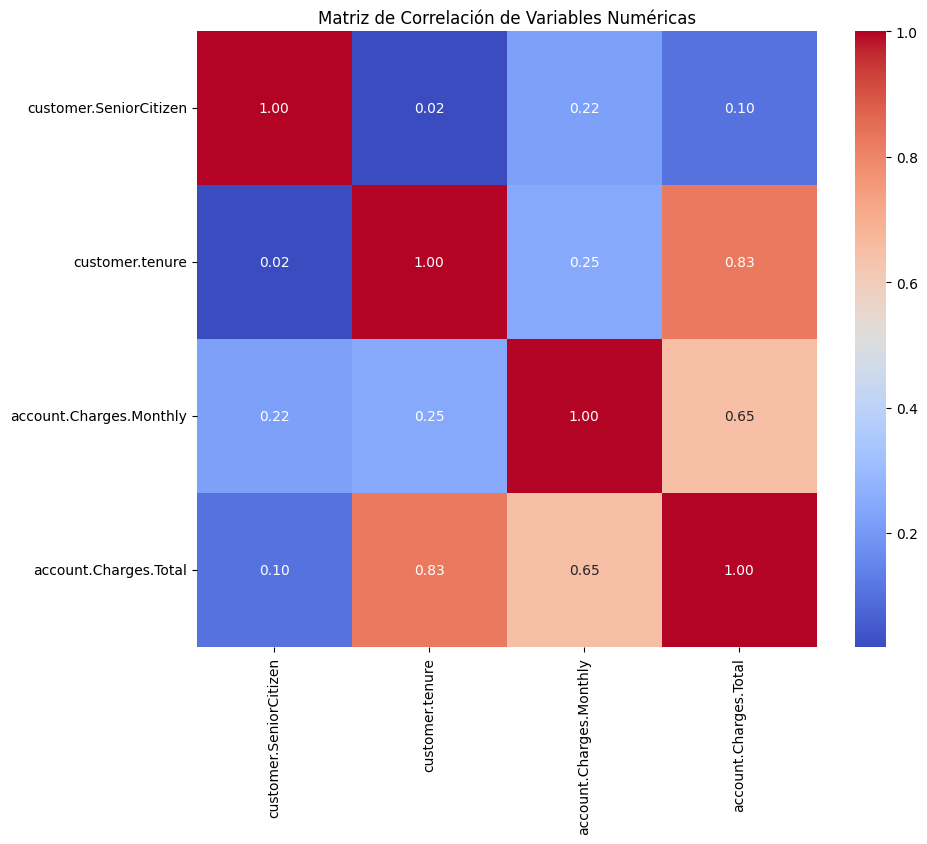

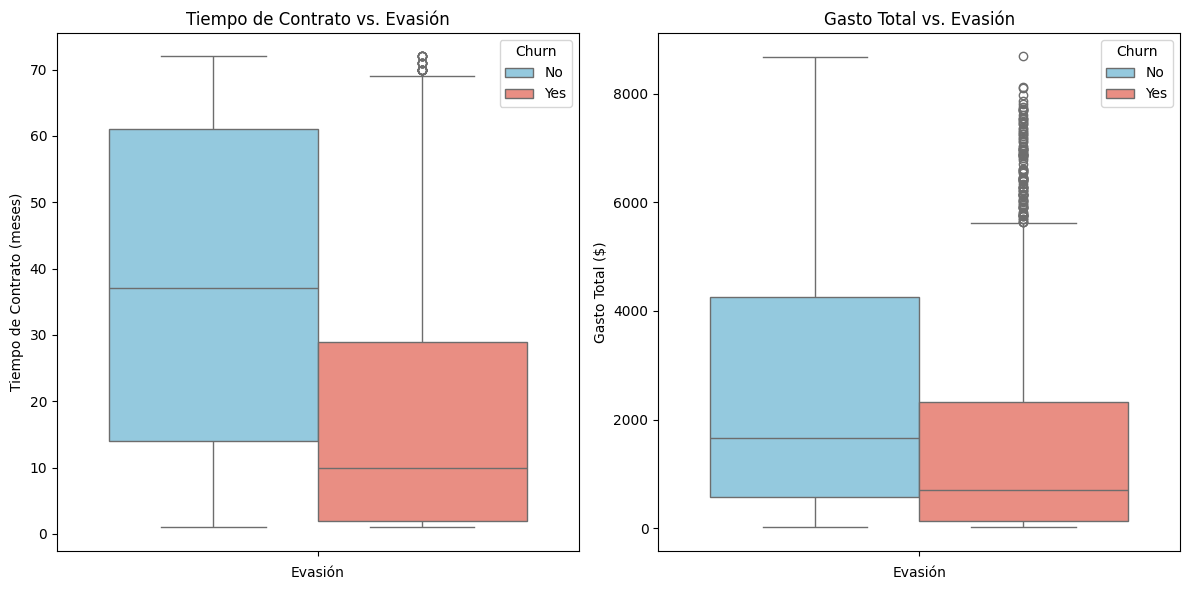

In [67]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

df['Churn'] = df['Churn'].replace({"":"No"})

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(hue='Churn', y='customer.tenure', data=df, palette=['skyblue', 'salmon'])
plt.title('Tiempo de Contrato vs. Evasión')
plt.xlabel('Evasión')
plt.ylabel('Tiempo de Contrato (meses)')

plt.subplot(1, 2, 2)
sns.boxplot(hue='Churn', y='account.Charges.Total', data=df, palette=['skyblue', 'salmon'])
plt.title('Gasto Total vs. Evasión')
plt.xlabel('Evasión')
plt.ylabel('Gasto Total ($)')
plt.tight_layout()
plt.legend = False
plt.show()

**Parte 4. Preprocesamiento y División de Datos.**

In [71]:
categorical_features = df.select_dtypes(include=['object']).columns.drop('Churn')
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

preprocessor_norm = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

preprocessor_no_norm = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Parte 5. Entrenamiento de Modelos.**

In [72]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_norm),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_no_norm),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

**Parte 6. Evaluación de Modelos.**

### Evaluación de Regresión Logística ###
Accuracy: 0.7961
Precision: 0.6196
Recall: 0.5401
F1-Score: 0.5771


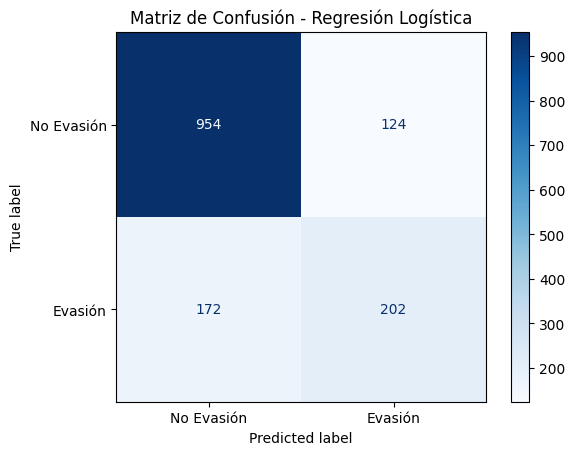

### Evaluación de Árbol de Decisión ###
Accuracy: 0.7197
Precision: 0.4558
Recall: 0.4545
F1-Score: 0.4552


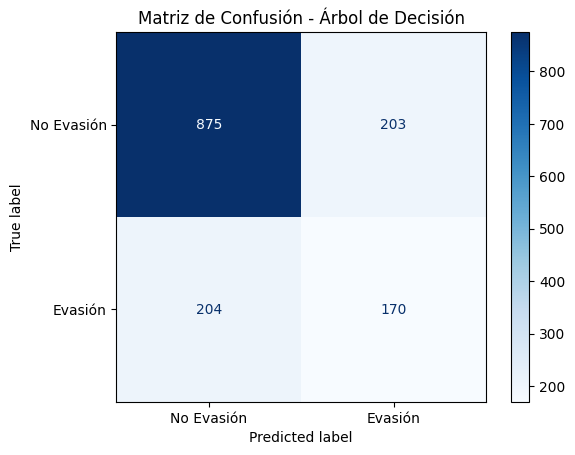

In [73]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"### Evaluación de {model_name} ###")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Evasión', 'Evasión'])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

evaluate_model(y_test, y_pred_lr, 'Regresión Logística')
evaluate_model(y_test, y_pred_dt, 'Árbol de Decisión')

**Parte 7. Análisis de Importancia de Variables.**

In [74]:
def get_feature_names(preprocessor, categorical_features, numerical_features):
    ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    num_features = numerical_features.tolist()
    return num_features + ohe_features.tolist()

feature_names_lr = get_feature_names(preprocessor_norm, categorical_features, numerical_features)
coefs_lr = pipeline_lr.named_steps['classifier'].coef_[0]
coefs_df_lr = pd.DataFrame({'feature': feature_names_lr, 'coefficient': coefs_lr})
coefs_df_lr['abs_coefficient'] = np.abs(coefs_df_lr['coefficient'])

print("Top 10 variables más influyentes (Regresión Logística):")
print(coefs_df_lr.sort_values(by='abs_coefficient', ascending=False).head(10))

feature_names_dt = get_feature_names(preprocessor_no_norm, categorical_features, numerical_features)
importances_dt = pipeline_dt.named_steps['classifier'].feature_importances_
importances_df_dt = pd.DataFrame({'feature': feature_names_dt, 'importance': importances_dt})

print("\nTop 10 variables más importantes (Árbol de Decisión):")
print(importances_df_dt.sort_values(by='importance', ascending=False).head(10))

Top 10 variables más influyentes (Regresión Logística):
                            feature  coefficient  abs_coefficient
1                   customer.tenure    -1.410499         1.410499
38        account.Contract_Two year    -0.731996         0.731996
3             account.Charges.Total     0.678712         0.678712
36  account.Contract_Month-to-month     0.564175         0.564175
15     internet.InternetService_DSL    -0.367712         0.367712
39      account.PaperlessBilling_No    -0.343453         0.343453
11           phone.PhoneService_Yes    -0.330531         0.330531
29         internet.TechSupport_Yes    -0.271980         0.271980
12           phone.MultipleLines_No    -0.256830         0.256830
20      internet.OnlineSecurity_Yes    -0.249625         0.249625

Top 10 variables más importantes (Árbol de Decisión):
                                   feature  importance
2                  account.Charges.Monthly    0.192748
3                    account.Charges.Total    0.17743